In [ ]:






import pandas as pd 
import numpy as np 
from google.colab.data_table import DataTable
DataTable.max_columns = 30
import torch 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/train_data.csv")



In [ ]:
df.shape

(72158, 24)

In [ ]:
df.head(5)

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0


In [ ]:
df.drop(["UID", "trip_uuid"],axis=1,inplace=True)

In [ ]:
df.head(5)


,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,2018-09-15 06:33:35.824186,713.521495,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,2018-10-01 06:48:37.637477,902.759458,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,2018-09-24 11:15:00.826140,923.666146,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,2018-09-22 19:17:22.242888,705.451567,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,2018-09-18 17:58:48.449251,1109.682268,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0


UID route_schedule_uuid trip_uuid source_center source_name destination_center destination_name

Printing Columns of Dataset 

In [ ]:
df["od_start_time"]=pd.to_datetime(df["od_start_time"])
df["od_end_time"]=pd.to_datetime(df["od_end_time"])
df["cutoff_timestamp"] = pd.to_datetime(df["cutoff_timestamp"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

In [ ]:
df["total_time_taken"]=(df["od_end_time"]-df["od_start_time"]).dt.total_seconds()/60
df["cutof_to_end"] = (df["od_end_time"] - df["cutoff_timestamp"]).dt.total_seconds()/60
df["tripCreate_to_trip_end"] = (df["od_end_time"] - df["trip_creation_time"]).dt.total_seconds()/60
df["tripCreate_to_cutoff"] = (df["cutoff_timestamp"] - df["trip_creation_time"]).dt.total_seconds()/60
df["cutoff_to_start"] = (df["cutoff_timestamp"] - df["od_start_time"]).dt.total_seconds()/60
df["tripCreate_to_trip_start"] = (df["od_start_time"] - df["trip_creation_time"]).dt.total_seconds()/60




In [ ]:
df.drop(["od_end_time", "od_start_time","cutoff_timestamp", "trip_creation_time"], axis = 1, inplace=True)

In [ ]:
percentage_of_null = df.isna().sum().sort_values(ascending = False) / len(df) * 100
percentage_of_null[percentage_of_null != 0]

osrm_time                   20.000554
osrm_distance               20.000554
tripCreate_to_cutoff         6.099116
tripCreate_to_trip_end       5.824718
tripCreate_to_trip_start     4.871255
route_schedule_uuid          4.012029
factor                       2.278334
cutof_to_end                 2.270019
segment_factor               1.606198
cutoff_to_start              1.288838
destination_center           1.112836
total_time_taken             0.997810
dtype: float64

In [ ]:
def frequencyEncoding(str ): 
  enc_nom_1 = (df.groupby(str).size()) / len(df)
  enc_nom_2 = enc_nom_1.to_dict()
  return df[str].apply(lambda x : enc_nom_1[x]), enc_nom_2

In [ ]:
df.dropna(subset=["destination_center", "route_schedule_uuid"],how="any",inplace=True)

In [ ]:
df.drop(["destination_center", "source_center"],axis=1,inplace=True)

In [ ]:
df["source_name"], dict_source_name = frequencyEncoding("source_name")
df["destination_name"], dict_destination_name = frequencyEncoding("destination_name")
df["route_schedule_uuid"], dict_route_uid = frequencyEncoding("route_schedule_uuid")

In [ ]:
means1 = df["source_name"].mean()
means2 = df["destination_name"].mean()
means3 = df["route_schedule_uuid"].mean()

In [ ]:
print(len(dict_source_name))

1451


In [ ]:
df = pd.get_dummies(df, columns=["route_type", "is_cutoff"])
df

,route_schedule_uuid,source_name,destination_name,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,...,total_time_taken,cutof_to_end,tripCreate_to_trip_end,tripCreate_to_cutoff,cutoff_to_start,tripCreate_to_trip_start,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True
0,0.000686,0.000686,0.008950,713.521495,44,158.807515,778.672716,1228.735753,2.782826,77.988686,...,250.286124,108.213736,250.286124,142.072388,142.072388,0.000000,0,1,0,1
1,0.001548,0.001241,0.038458,902.759458,22,81.388109,227.479029,NaN,3.625248,68.517914,...,490.395573,70.127291,940.811103,870.683811,420.268282,450.415529,0,1,0,1
3,0.008264,0.004555,0.002628,705.451567,176,262.866674,510.123878,999.421258,2.946647,101.876844,...,548.827498,308.087381,2285.623495,1977.536114,240.740116,1736.795997,0,1,0,1
4,0.001548,0.028062,0.035713,1109.682268,198,379.389280,NaN,NaN,1.998790,46.571301,...,1007.975208,344.724154,1007.975208,663.251054,663.251054,0.000000,0,1,0,1
5,0.011155,0.160152,0.076448,3145.532578,1474,1499.349234,2331.812110,2478.458117,2.513150,78.860571,...,3042.970983,2498.171505,3042.970983,544.799477,544.799477,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,0.001095,0.023142,0.002818,1132.865742,66,135.001150,NaN,1392.622148,1.950803,55.856356,...,553.504299,100.488728,553.504299,453.015571,453.015571,0.000000,0,1,0,1
72154,0.000423,0.069381,0.001387,355.951299,18,74.245265,374.255819,NaN,1.927801,35.976514,...,166.344386,35.553918,166.344386,130.790468,130.790468,0.000000,1,0,0,1
72155,0.000657,0.000263,0.000759,737.899031,44,54.097087,895.612578,902.191591,2.148569,44.101033,...,228.084891,74.795386,546.984874,472.189488,153.289505,318.899982,0,1,0,1
72156,0.000234,0.013827,0.000847,845.738186,88,99.918631,NaN,1393.905281,2.206373,37.771823,...,718.745124,147.995094,718.745124,570.750030,570.750030,0.000000,0,1,0,1


In [ ]:
df.columns

Index(['route_schedule_uuid', 'source_name', 'destination_name',
       'start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time',
       'total_time_taken', 'cutof_to_end', 'tripCreate_to_trip_end',
       'tripCreate_to_cutoff', 'cutoff_to_start', 'tripCreate_to_trip_start',
       'route_type_Carting', 'route_type_FTL', 'is_cutoff_False',
       'is_cutoff_True'],
      dtype='object')

In [ ]:
df.shape

(68491, 24)

In [ ]:
y=pd.DataFrame(df["actual_time"])
X=df.drop("actual_time",axis=1)
indexex = X.index

In [ ]:
X.shape

(68491, 23)

In [ ]:
X.head(10)

,route_schedule_uuid,source_name,destination_name,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,...,total_time_taken,cutof_to_end,tripCreate_to_trip_end,tripCreate_to_cutoff,cutoff_to_start,tripCreate_to_trip_start,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True
0,0.000686,0.000686,0.008950,713.521495,44,158.807515,778.672716,1228.735753,2.782826,77.988686,...,250.286124,108.213736,250.286124,142.072388,142.072388,0.000000,0,1,0,1
1,0.001548,0.001241,0.038458,902.759458,22,81.388109,227.479029,NaN,3.625248,68.517914,...,490.395573,70.127291,940.811103,870.683811,420.268282,450.415529,0,1,0,1
3,0.008264,0.004555,0.002628,705.451567,176,262.866674,510.123878,999.421258,2.946647,101.876844,...,548.827498,308.087381,2285.623495,1977.536114,240.740116,1736.795997,0,1,0,1
4,0.001548,0.028062,0.035713,1109.682268,198,379.389280,NaN,NaN,1.998790,46.571301,...,1007.975208,344.724154,1007.975208,663.251054,663.251054,0.000000,0,1,0,1
5,0.011155,0.160152,0.076448,3145.532578,1474,1499.349234,2331.812110,2478.458117,2.513150,78.860571,...,3042.970983,2498.171505,3042.970983,544.799477,544.799477,0.000000,0,1,0,1
6,0.003373,0.018455,0.038458,3452.489276,1012,1091.565072,1421.126351,1749.869939,2.303103,78.117604,...,3363.112162,1795.146519,6496.022231,4700.875712,1567.965643,3132.910069,0,1,0,1
7,0.004336,0.160152,0.008439,1771.414156,88,195.100270,271.600863,NaN,3.257535,87.577554,...,1739.753831,223.722028,1739.753831,1516.031803,1516.031803,0.000000,0,1,0,1
8,0.000496,0.004585,0.026383,306.660192,18,69.267065,629.478826,NaN,3.146938,47.693622,...,123.878179,95.773107,123.878179,28.105072,28.105072,0.000000,1,0,0,1
9,0.002511,0.001270,0.001270,756.643030,54,105.295134,168.260324,282.353151,2.080589,15.308492,...,165.857232,83.895210,371.246168,287.350959,81.962022,205.388937,1,0,0,1
10,0.007884,0.069381,0.105985,3339.425293,594,644.511439,794.444280,1232.545425,2.079214,48.057447,...,3284.800152,1102.686768,3284.800152,2182.113384,2182.113384,0.000000,0,1,0,1


In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=3)

In [ ]:
# Familiar imports
import numpy as np
import pandas as pd

# For ordinal encoding categorical variables, splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from hyperopt.pyll.base import scope

space = {'max_depth': scope.int(hp.quniform("max_depth", 1, 7, 1)),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.uniform('reg_alpha', 0,50),
        'reg_lambda' : hp.uniform('reg_lambda', 10,100),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
        'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
        'n_estimators': 10000,
        'learning_rate': hp.uniform('learning_rate', 0, .17),
        'tree_method':'gpu_hist', 
        'gpu_id': 0,
        'random_state': 5,
        'max_bin' : scope.int(hp.quniform('max_bin', 200, 600, 1))}


In [ ]:
#Define the hyperopt objective.
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(**space)
    
    #Define evaluation datasets.
    evaluation = [(X_train, y_train), (X_valid, y_valid)]
    
    #Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=100,verbose=False)

    #Obtain prediction and rmse score.
    pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, pred, squared=False)
    print ("SCORE:", rmse)
    
    #Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

In [ ]:
#Run 20 trials.
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

print(best)

SCORE:
63.21320676160169
SCORE:
23.797350359299113
SCORE:
34.886268498071594
SCORE:
22.94156227855331
SCORE:
30.143066786786004
SCORE:
25.32602938558941
SCORE:
61.693598259096476
SCORE:
27.48723940683924
SCORE:
27.1224520011092
SCORE:
24.13479182988064
SCORE:
25.181781358945994
SCORE:
24.65905673171846
SCORE:
31.080849262553254
SCORE:
32.560363351769816
SCORE:
25.449420961908714
SCORE:
26.135784173829922
SCORE:
23.729805612086093
SCORE:
24.727944771465022
SCORE:
29.418710484017144
SCORE:
23.94027423029515
SCORE:
24.027956776968843
SCORE:
20.91847151271985
SCORE:
21.791826205652153
SCORE:
21.924566457341566
SCORE:
181.8531716825611
SCORE:
23.768305681741307
SCORE:
23.661258026259723
SCORE:
24.004148466668568
SCORE:
22.55945478792684
SCORE:
24.280644334081032
100%|██████████| 30/30 [13:23<00:00, 26.78s/trial, best loss: 20.91847151271985]
{'colsample_bytree': 0.98648267736637, 'gamma': 0.005105482333637418, 'learning_rate': 0.09686825607990068, 'max_bin': 595.0, 'max_depth': 5.0, 'min_ch

In [ ]:
#Create instace of best model.
best_model = trials.results[np.argmin([r['loss'] for r in 
    trials.results])]['model']

#Examine model hyperparameters
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.98648267736637, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.005105482333637418, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09686825607990068, max_bin=595,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1.5807221799479567, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=5, ...)


In [ ]:
#Create instace of best model.
best_model = trials.results[np.argmin([r['loss'] for r in 
    trials.results])]['model']

#Examine model hyperparameters
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8091354056362351, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.35951203490614503, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03444608276069379, max_bin=459,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1.1815927885370852, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=5, ...)


In [ ]:
xgb_preds_best = best_model.predict(X_valid)
xgb_score_best = mean_squared_error(y_valid, xgb_preds_best, squared=False)
print('RMSE_Best_Model:', xgb_score_best)

xgb_standard = xgb.XGBRegressor().fit(X_train, y_train)
standard_score = mean_squared_error(y_valid, xgb_standard.predict(X_valid), squared=False)
print('RMSE_Standard_Model:', standard_score)

RMSE_Best_Model: 20.91847151271985
RMSE_Standard_Model: 26.484021013300787


In [ ]:
model = XGBRegressor()

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

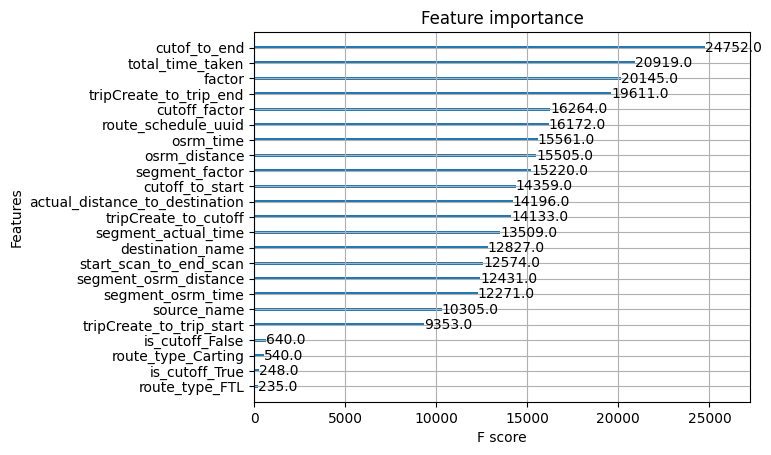

In [ ]:
%matplotlib inline
xgb.plot_importance(best_model,ax=plt.gca())

In [ ]:
# predictions=model.predict(X_test)
best_model.score(X_valid, y_valid)

0.9987618466322065

In [ ]:
# predictions=model.predict(X_test)
best_model.score(X_valid, y_valid)

0.9984773509241922

In [ ]:
# predictions=model.predict(X_test)
model.score(X_test, y_test)

0.997921459918917

https://www.kaggle.com/competitions/cassandra23-ps-2/data

In [ ]:
!unzip "/content/test_data.csv.zip"

Archive:  /content/test_data.csv.zip
  inflating: test_data.csv           


In [ ]:
test_data = pd.read_csv("/content/test_data.csv")

In [ ]:
percentage_of_null = test_data.isna().sum().sort_values(ascending = False) / len(test_data) * 100
percentage_of_null[percentage_of_null != 0]

Series([], dtype: float64)

In [ ]:
uid = test_data["UID"]

In [ ]:
test_data.drop(["UID", "trip_uuid"],axis=1,inplace=True)


In [ ]:
test_data["od_start_time"]=pd.to_datetime(test_data["od_start_time"])
test_data["od_end_time"]=pd.to_datetime(test_data["od_end_time"])
test_data["cutoff_timestamp"] = pd.to_datetime(test_data["cutoff_timestamp"])
test_data["trip_creation_time"] = pd.to_datetime(test_data["trip_creation_time"])

In [ ]:
test_data["total_time_taken"]=(test_data["od_end_time"]-test_data["od_start_time"]).dt.total_seconds()/60
test_data["cutof_to_end"] = (test_data["od_end_time"] - test_data["cutoff_timestamp"]).dt.total_seconds()/60
test_data["tripCreate_to_trip_end"] = (test_data["od_end_time"] - test_data["trip_creation_time"]).dt.total_seconds()/60
test_data["tripCreate_to_cutoff"] = (test_data["cutoff_timestamp"] - test_data["trip_creation_time"]).dt.total_seconds()/60
test_data["cutoff_to_start"] = (test_data["cutoff_timestamp"] - test_data["od_start_time"]).dt.total_seconds()/60
test_data["tripCreate_to_trip_start"] = (test_data["od_start_time"] - test_data["trip_creation_time"]).dt.total_seconds()/60




In [ ]:
test_data.drop(["od_end_time", "od_start_time","cutoff_timestamp", "trip_creation_time"], axis = 1, inplace=True)

In [ ]:
# test_data['FTL'] = test_data.route_type=="FTL"
# test_data['Carting'] = test_data.route_type=="Carting"
# test_data["FTL"]=test_data["FTL"].astype(int)
# test_data["Carting"]=test_data["Carting"].astype(int)
# test_data["is_cutoff"]=test_data["is_cutoff"].astype(int)

In [ ]:
test_data.drop(["destination_center", "source_center"],axis=1,inplace=True)


In [ ]:
percentage_of_null = test_data.isna().sum().sort_values(ascending = False) / len(test_data) * 100
percentage_of_null[percentage_of_null != 0]

Series([], dtype: float64)

In [ ]:
test_data.nunique()

route_schedule_uuid                1466
route_type                            2
source_name                        1451
destination_name                   1420
start_scan_to_end_scan             1886
is_cutoff                             2
cutoff_factor                       465
actual_distance_to_destination    72079
osrm_time                          1484
osrm_distance                     70362
factor                            27373
segment_actual_time                 564
segment_osrm_time                   177
segment_osrm_distance             63127
segment_factor                     4136
total_time_taken                  22208
cutof_to_end                      71659
tripCreate_to_trip_end            22208
tripCreate_to_cutoff              71472
cutoff_to_start                   70667
tripCreate_to_trip_start          11538
dtype: int64

In [ ]:
# def frequencyEncodingNew(str ): 
#   enc_nom_1 = (test_data.groupby(str).size()) / len(test_data)
#   return test_data[str].apply(lambda x : enc_nom_1[x])

In [ ]:
(test_data["source_name"] == 'Sitarganj_SidculRd_D (Uttarakhand)').sum()

3

In [ ]:
test_data["source_name"] = test_data["source_name"].apply(lambda x : dict_source_name[x]  if x in dict_source_name else means1)
test_data["destination_name"] = test_data["destination_name"].apply(lambda x : dict_destination_name[x]  if x in dict_destination_name else means2)
test_data["route_schedule_uuid"] = test_data["route_schedule_uuid"].apply(lambda x : dict_route_uid[x]  if x in dict_route_uid else means3)

In [ ]:
# test_data["source_name"] = frequencyEncodingNew("source_name")
# test_data["destination_name"] = frequencyEncodingNew("destination_name")
# test_data["route_schedule_uuid"] = frequencyEncodingNew("route_schedule_uuid")

In [ ]:
percentage_of_null = test_data.isna().sum().sort_values(ascending = False) / len(test_data) * 100
percentage_of_null[percentage_of_null != 0]

Series([], dtype: float64)

In [ ]:
test_data = pd.get_dummies(test_data, columns=["route_type", "is_cutoff"])
test_data

,route_schedule_uuid,source_name,destination_name,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,...,total_time_taken,cutof_to_end,tripCreate_to_trip_end,tripCreate_to_cutoff,cutoff_to_start,tripCreate_to_trip_start,route_type_Carting,route_type_FTL,is_cutoff_False,is_cutoff_True
0,0.000803,0.000365,0.000365,86.0,27,27.637279,28.0,32.5395,1.428571,16.0,...,86.213637,46.428854,132.145999,85.717146,39.784783,45.932363,1,0,0,1
1,0.000803,0.000365,0.000365,86.0,39,39.386040,44.0,54.2181,1.545455,6.0,...,86.213637,73.837280,132.145999,58.308719,12.376357,45.932363,1,0,1,0
2,0.000803,0.000438,0.001226,109.0,9,10.403038,11.0,12.1171,1.363636,15.0,...,109.173183,20.960463,241.319182,220.358719,88.212720,132.145999,1,0,0,1
3,0.000803,0.000438,0.001226,109.0,36,38.939167,39.0,47.1900,1.948718,10.0,...,109.173183,80.993796,241.319182,160.325386,28.179387,132.145999,1,0,0,1
4,0.000540,0.063541,0.025668,302.0,22,23.194334,24.0,26.8622,1.583333,38.0,...,302.372403,39.156097,302.372403,263.216305,263.216305,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,0.000759,0.011447,0.105985,427.0,9,11.080143,23.0,15.3398,1.913043,44.0,...,427.686364,44.876968,427.686364,382.809396,382.809396,0.000000,1,0,0,1
72154,0.000759,0.011447,0.105985,427.0,18,19.221595,35.0,34.4366,1.600000,12.0,...,427.686364,56.876968,427.686364,370.809396,370.809396,0.000000,1,0,0,1
72155,0.000759,0.011447,0.105985,427.0,27,27.964113,50.0,50.7273,1.400000,13.0,...,427.686364,70.843634,427.686364,356.842729,356.842729,0.000000,1,0,0,1
72156,0.000759,0.011447,0.105985,427.0,45,45.258278,60.0,67.9280,1.566667,12.0,...,427.686364,94.826968,427.686364,332.859396,332.859396,0.000000,1,0,0,1


In [ ]:
y_test_pred = best_model.predict(test_data)

In [ ]:
actual_time = pd.DataFrame(y_test_pred)

In [ ]:
submissions = pd.concat([uid, actual_time], axis=1)

In [ ]:
submissions

,UID,0
0,XMsT9clviB,34.609852
1,1iUuyRUZ2Y,59.984158
2,wancwiAIU3,13.130895
3,1tIt8EwJjB,66.350792
4,W2vL6bJrjt,32.682308
...,...,...
72153,L5IrEpNBFb,35.211632
72154,s5TDXjnN3s,46.024548
72155,0croXy5yK5,59.094624
72156,P0okvBa2Ik,91.698341


In [ ]:
submissions

,UID,0
0,XMsT9clviB,34.609852
1,1iUuyRUZ2Y,59.984158
2,wancwiAIU3,13.130895
3,1tIt8EwJjB,66.350792
4,W2vL6bJrjt,32.682308
...,...,...
72153,L5IrEpNBFb,35.211632
72154,s5TDXjnN3s,46.024548
72155,0croXy5yK5,59.094624
72156,P0okvBa2Ik,91.698341


In [ ]:
submissions

,UID,0
0,XMsT9clviB,35.547569
1,1iUuyRUZ2Y,62.570835
2,wancwiAIU3,11.129128
3,1tIt8EwJjB,64.443176
4,W2vL6bJrjt,26.575966
...,...,...
72153,L5IrEpNBFb,31.247883
72154,s5TDXjnN3s,39.862946
72155,0croXy5yK5,54.029457
72156,P0okvBa2Ik,85.012032


In [ ]:
submissions

,UID,0
0,XMsT9clviB,34.015900
1,1iUuyRUZ2Y,57.988430
2,wancwiAIU3,8.964727
3,1tIt8EwJjB,61.805134
4,W2vL6bJrjt,29.967314
...,...,...
72153,L5IrEpNBFb,27.567261
72154,s5TDXjnN3s,38.622829
72155,0croXy5yK5,45.598896
72156,P0okvBa2Ik,70.257195


In [ ]:
submissions

,UID,0
0,XMsT9clviB,35.041985
1,1iUuyRUZ2Y,57.296249
2,wancwiAIU3,10.016412
3,1tIt8EwJjB,62.885166
4,W2vL6bJrjt,29.023727
...,...,...
72153,L5IrEpNBFb,29.415340
72154,s5TDXjnN3s,41.446804
72155,0croXy5yK5,49.102318
72156,P0okvBa2Ik,74.557480


In [ ]:
submissions

,UID,0
0,XMsT9clviB,35.832008
1,1iUuyRUZ2Y,61.189735
2,wancwiAIU3,10.714415
3,1tIt8EwJjB,64.445320
4,W2vL6bJrjt,31.449581
...,...,...
72153,L5IrEpNBFb,29.736961
72154,s5TDXjnN3s,41.757080
72155,0croXy5yK5,50.030430
72156,P0okvBa2Ik,80.560219


In [ ]:
submissions

,UID,0
0,XMsT9clviB,36.747791
1,1iUuyRUZ2Y,61.159710
2,wancwiAIU3,10.898377
3,1tIt8EwJjB,62.887115
4,W2vL6bJrjt,28.361284
...,...,...
72153,L5IrEpNBFb,28.379013
72154,s5TDXjnN3s,43.098770
72155,0croXy5yK5,48.816715
72156,P0okvBa2Ik,77.395515


In [ ]:
submissions

,UID,0
0,XMsT9clviB,36.210384
1,1iUuyRUZ2Y,57.849010
2,wancwiAIU3,10.298333
3,1tIt8EwJjB,63.894344
4,W2vL6bJrjt,29.631670
...,...,...
72153,L5IrEpNBFb,26.743139
72154,s5TDXjnN3s,39.207600
72155,0croXy5yK5,50.502338
72156,P0okvBa2Ik,75.293800


In [ ]:
submissions

,UID,0
0,XMsT9clviB,23.963266
1,1iUuyRUZ2Y,50.623304
2,wancwiAIU3,4.513478
3,1tIt8EwJjB,41.495418
4,W2vL6bJrjt,16.922772
...,...,...
72153,L5IrEpNBFb,12.679531
72154,s5TDXjnN3s,22.159828
72155,0croXy5yK5,32.352185
72156,P0okvBa2Ik,51.197978


In [ ]:
submissions.rename(columns = {0:'actual_time'}, inplace = True)

In [ ]:
submissions.to_csv("submisions13.csv", index=False)

In [ ]:
output = pd.read_csv("/content/submisions1.csv")

In [ ]:
output


,UID,0
0,XMsT9clviB,23.963266
1,1iUuyRUZ2Y,50.623304
2,wancwiAIU3,4.513478
3,1tIt8EwJjB,41.495418
4,W2vL6bJrjt,16.922772
...,...,...
72153,L5IrEpNBFb,12.679531
72154,s5TDXjnN3s,22.159828
72155,0croXy5yK5,32.352185
72156,P0okvBa2Ik,51.197978
